# Importing neccessory libraries

In [1]:
#pip install xgboost

In [82]:
#DATA manupulating and handling
import numpy as np
import pandas as pd

# Data visulization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Data preprocesing and EDA libraries.
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Waring filer library
import warnings
warnings.filterwarnings('ignore')

#Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,learning_curve


#ML models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation libraries
from sklearn.metrics import r2_score,mean_squared_error

#Unsupervised ML library:
from sklearn.cluster import KMeans

# Loading the dataset

In [3]:
df = pd.read_excel('Capstone Project.xlsx')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Exploratry data anlysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation from df.info()

 1. There are no null values
 2. 1030 rows and 9 columns
 3. Except age all other column data type is float
 4. Dependent variable -strenght and rest are independent variable

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Analysis from descriptive statistics:
1. There might be skewness in data in some columns
2. There be chance of outliers if we compare quartiles of some of the columns(Age,cement,slag,superplastic, strenght in the upper wisker region)
3. Since minium and Q1 value is same for slag Ash Superplastics so we dont have ouliers in lower whiskers region
4. The range of values in age is from 1 to 365 days

## Building a custom summary function for EDA report

In [6]:
def custom_summary(my_df):
    results = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'Feature Name': col,
                'Count': my_df[col].count(),
                'Minimum': my_df[col].min(),
                'Quartile 1': my_df[col].quantile(0.25),
                'Quartile 2': my_df[col].quantile(0.50),
                'Quartile 3': my_df[col].quantile(0.75),
                'Mean': my_df[col].mean(),
                'Maximum': my_df[col].max(),
                'Variance': round(my_df[col].var()),
                'Standard Deviation': my_df[col].std(),
                'Skewness': my_df[col].skew(),
                'Kurtosis': my_df[col].kurt()
        })
        results.append(stats)
        
    result_df = pd.DataFrame(results)
    # Skewness  type:
    skewness_label = []
    for i in result_df['Skewness']:
          if i <= -1:
              skewness_label.append('Highly negatively skewed')                   
          elif -1 < i <= -0.5:
              skewness_label.append('Moderately negatively skewed')    
          elif -0.5 < i < 0:
              skewness_label.append('Fairly negatively skewed')                        
          elif 0 <= i <= 0.5:
              skewness_label.append('Fairly postively skewed')                        
          elif 0.5 <= i <= 1:
              skewness_label.append('Moderately postively skewed')                       
          else:
              skewness_label.append('Highly postively skewed')                    
    result_df['Skewness Comment']= skewness_label
    
    # Kurtosis type:
    kurtosis_label=[]
    for i in result_df['Kurtosis']:
           if i >=1:
               kurtosis_label.append('Leptokurtic curve')                  
           elif i<=-1:
               kurtosis_label.append('Platykurtic curve')                   
           else:
               kurtosis_label.append('Mesokurtic curve')  
    result_df['Kurtosis Comment']= kurtosis_label
    
    #Outlier type()
    Outlier_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3-Q1
            LW = Q1-IQR*1.5
            UW = Q3+IQR*1.5
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                Outlier_label.append('Have Outliers')
            else:
                Outlier_label.append('Have No Outliers')
    result_df['Outlier Comment'] = Outlier_label
    
    return result_df

In [7]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile 1,Quartile 2,Quartile 3,Mean,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00,192.375,272.900,350.000,281.167864,540.0,10922,104.506364,0.509481,-0.520652,Moderately postively skewed,Mesokurtic curve,Have No Outliers
1,slag,1030,0.00,0.000,22.000,142.950,73.895825,359.4,7444,86.279342,0.800717,-0.508175,Moderately postively skewed,Mesokurtic curve,Have Outliers
2,ash,1030,0.00,0.000,0.000,118.300,54.188350,200.1,4096,63.997004,0.537354,-1.328746,Moderately postively skewed,Platykurtic curve,Have No Outliers
3,water,1030,121.80,164.900,185.000,192.000,181.567282,247.0,456,21.354219,0.074628,0.122082,Fairly postively skewed,Mesokurtic curve,Have Outliers
4,superplastic,1030,0.00,0.000,6.400,10.200,6.204660,32.2,36,5.973841,0.907203,1.411269,Moderately postively skewed,Leptokurtic curve,Have Outliers
5,coarseagg,1030,801.00,932.000,968.000,1029.400,972.918932,1145.0,6046,77.753954,-0.040220,-0.599016,Fairly negatively skewed,Mesokurtic curve,Have No Outliers
6,fineagg,1030,594.00,730.950,779.500,824.000,773.580485,992.6,6428,80.175980,-0.253010,-0.102177,Fairly negatively skewed,Mesokurtic curve,Have Outliers
7,age,1030,1.00,7.000,28.000,56.000,45.662136,365.0,3990,63.169912,3.269177,12.168989,Highly postively skewed,Leptokurtic curve,Have Outliers
8,strength,1030,2.33,23.710,34.445,46.135,35.817961,82.6,279,16.705742,0.416977,-0.313725,Fairly postively skewed,Mesokurtic curve,Have Outliers


Analysis from custom_summary(df):

1) Cement has a Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate.
2) Slag has a mesokurtic curve which implies that data points are moderate in distance from mean, so mean and SD are moderate.
3) Ash has a Platykurtic curve which implies that mean doest not represent the whole data, so the SD is high
4) Water has a mesokurtic curve which implies that data points are moderate in distance from mean, so mean and SD are moderate.
5) superplastic has a leptokurtic curve which implies data points are closer to the mean.


### Performing Outlier treatment

In [8]:
def replace_outlier(my_df,col, method='Quartile', strategy = 'Median'):
    col_data = my_df[col] #method means how you are supposed to detect outliers
    
    if method =='Quartile':
        #Using Quartiles to comment IQR
        Q1 = col_data.quantile(0.25)
        Q2 = col_data.quantile(0.50)
        Q3 = col_data.quantile(0.75)
        
        IQR = Q3-Q1
        LW = Q1-(IQR*1.5)
        UW = Q3+(IQR*1.5)
        
    elif method == 'Standard Deviation': #We are using emprical method here
        mean = col_data.mean()
        std = col_data.std()
        Lw = mean-2*std
        UW = mean + 2*std
        
    else:
        print('Pass a correct method')
        
    #Printing all the outliers
    
    outliers = my_df.loc[(col_data<LW) | (col_data>UW)]
    outliers_density = round(len(outliers)/len(my_df),2)
    if len(outliers)==0:
        print(f'Feature {col} doesnot have any ouliers')
        print('\n')
        
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'outlier percentage in {col} is {outliers_density}%')
        print('\n')
        display(my_df[(col_data<LW) | (col_data>UW)])
        
    #replacing outliers
    if strategy == 'Median':
        my_df.loc[(col_data<LW )| (col_data>UW), col] = Q2
        
    elif strategy == 'Mean':
        my_df.loc[(col_data<LW )| (col_data>UW), col] = Q3
        
    else:
        print('Pass a correct strategy')
        
    return my_df

### ODT(Outlier dectection Techniques) Plots

1. Descriptive plots
2. Histogram with outliers
3. Histogram without outliers

In [9]:
def odt_plots(my_df, col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,8))
    
    #Descriptive Statistics BOX plot
    
    sns.boxplot(my_df[col], ax=ax1)
    ax1.set_title(col + 'Box plot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Boxplot')
    
    #Plotting Histogram with outliers
    
    sns.distplot(my_df[col], ax=ax2, fit= sci.norm)  #On histogram we are fitting normal distribution curve
    ax2.set_title(col + 'Histogram with outliers')
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(), color = 'brown')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Histogram with outliers')
    
    #Replacing outlier
    df_out = replace_outlier(my_df, col)
    
    #Plotting Histogram without outliers
    sns.distplot(df_out[col], ax=ax3, fit= sci.norm)  #On histogram we are fitting normal distribution curve
    ax3.set_title(col + 'Histogram with out outliers')
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(), color = 'brown')
    ax3.set_xlabel('Values')
    ax3.set_ylabel('Histogram without outliers')
    plt.show()

Feature cement doesnot have any ouliers




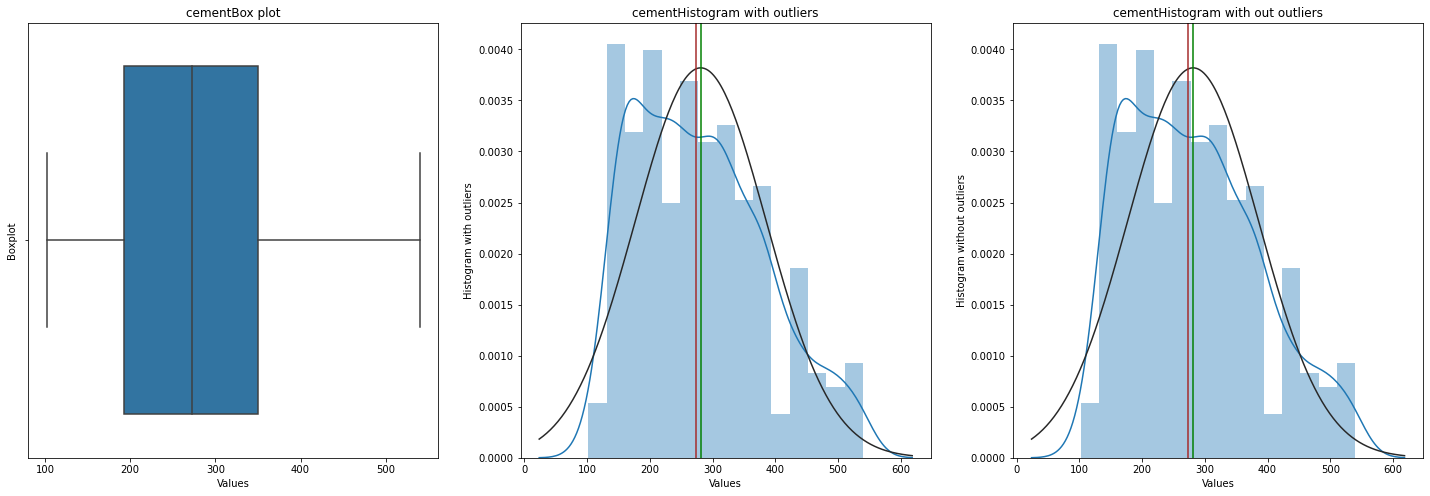

Feature slag has outliers


Total number of outliers in slag are 2


outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


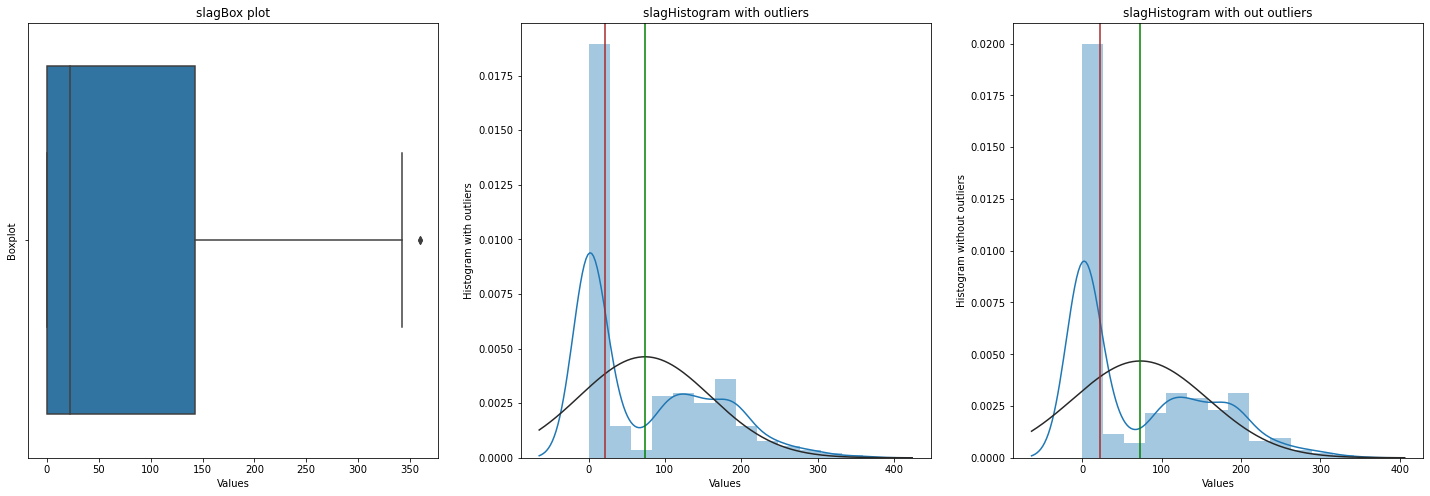

Feature ash doesnot have any ouliers




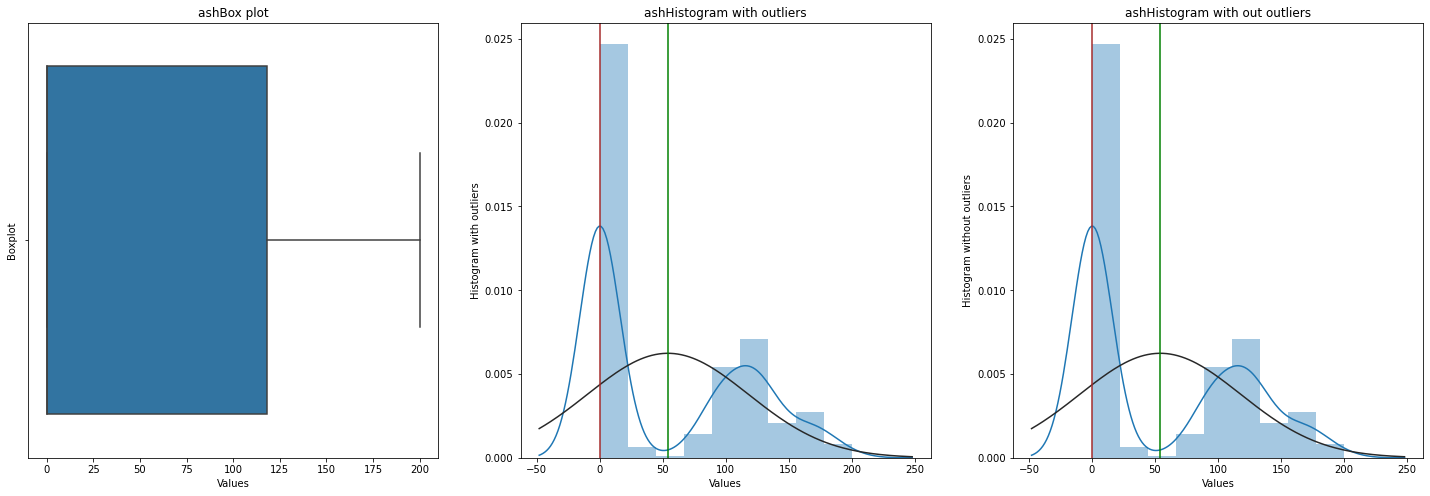

Feature water has outliers


Total number of outliers in water are 9


outlier percentage in water is 0.01%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


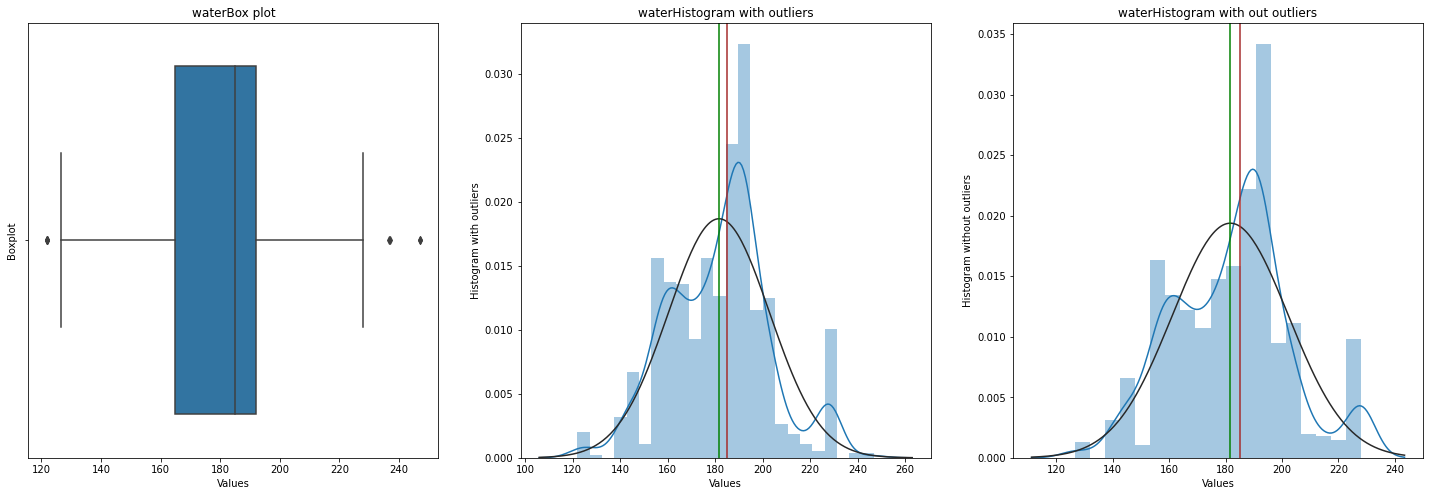

Feature superplastic has outliers


Total number of outliers in superplastic are 10


outlier percentage in superplastic is 0.01%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


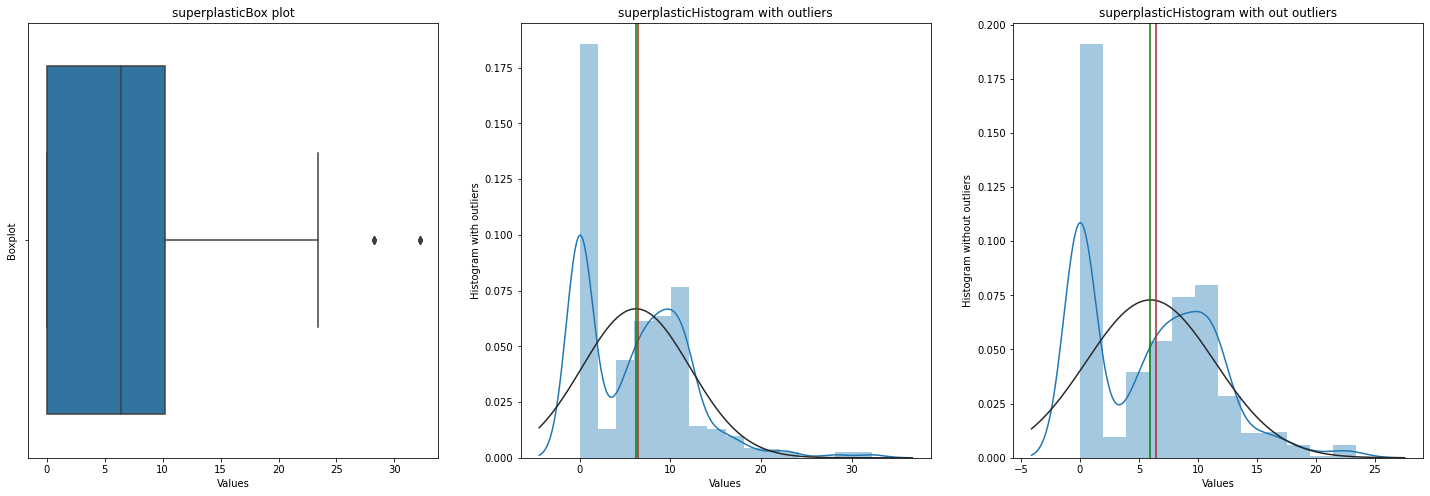

Feature coarseagg doesnot have any ouliers




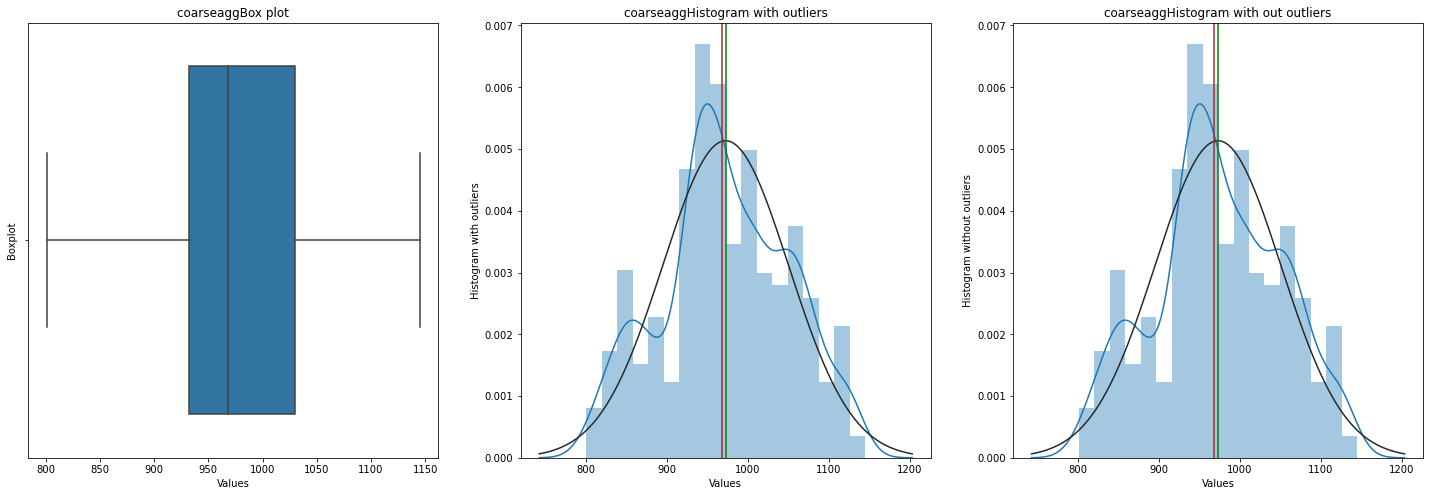

Feature fineagg has outliers


Total number of outliers in fineagg are 5


outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


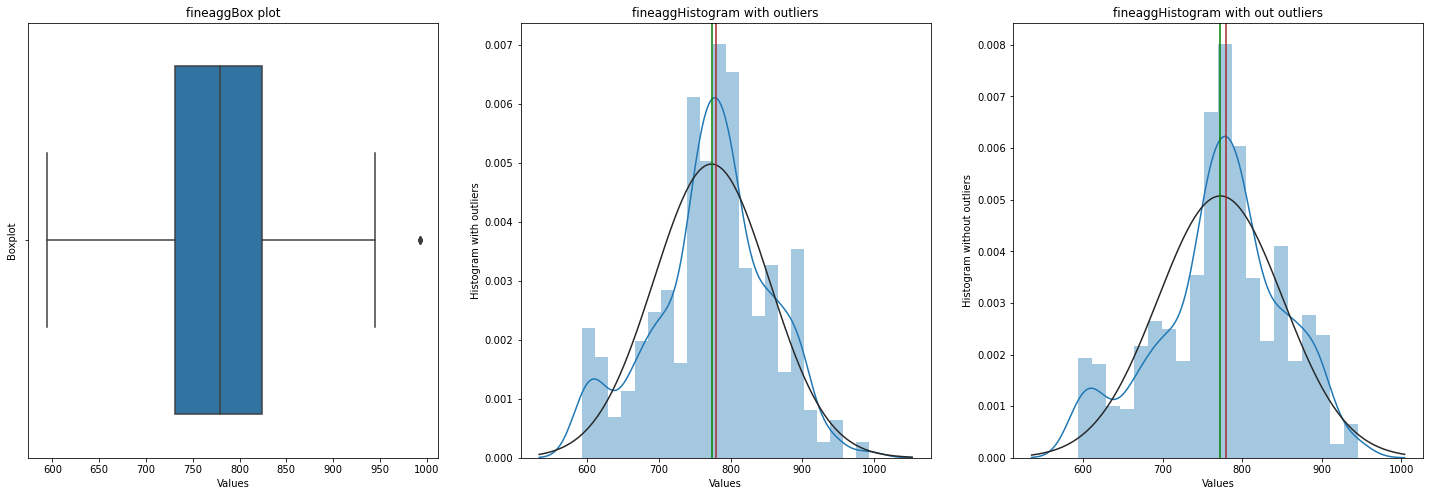

Feature age has outliers


Total number of outliers in age are 59


outlier percentage in age is 0.06%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


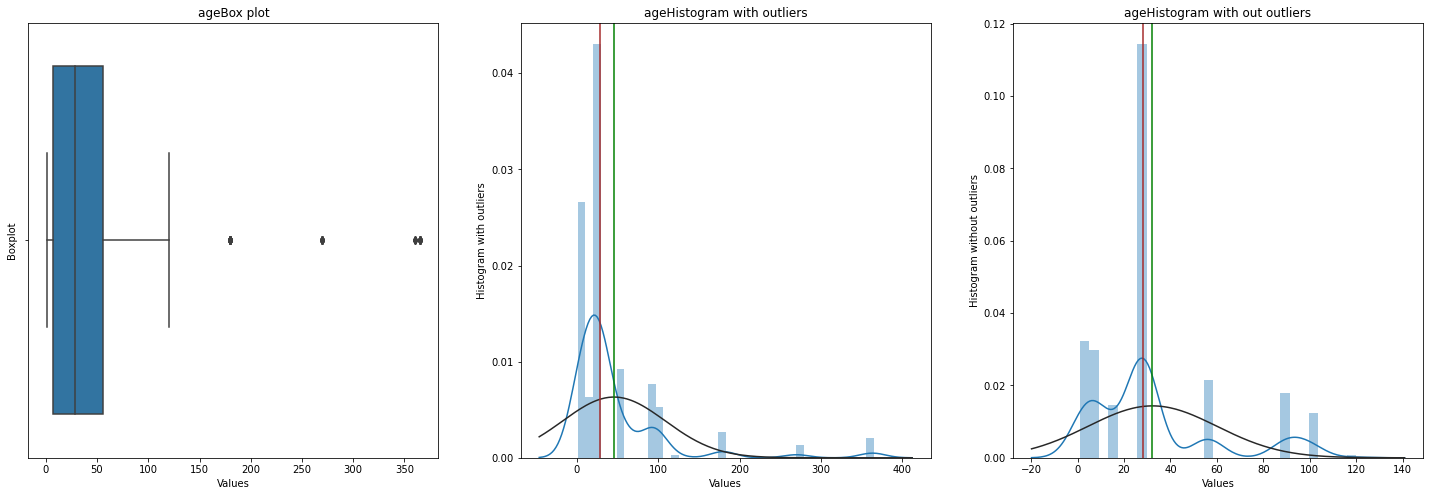

Feature strength has outliers


Total number of outliers in strength are 4


outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


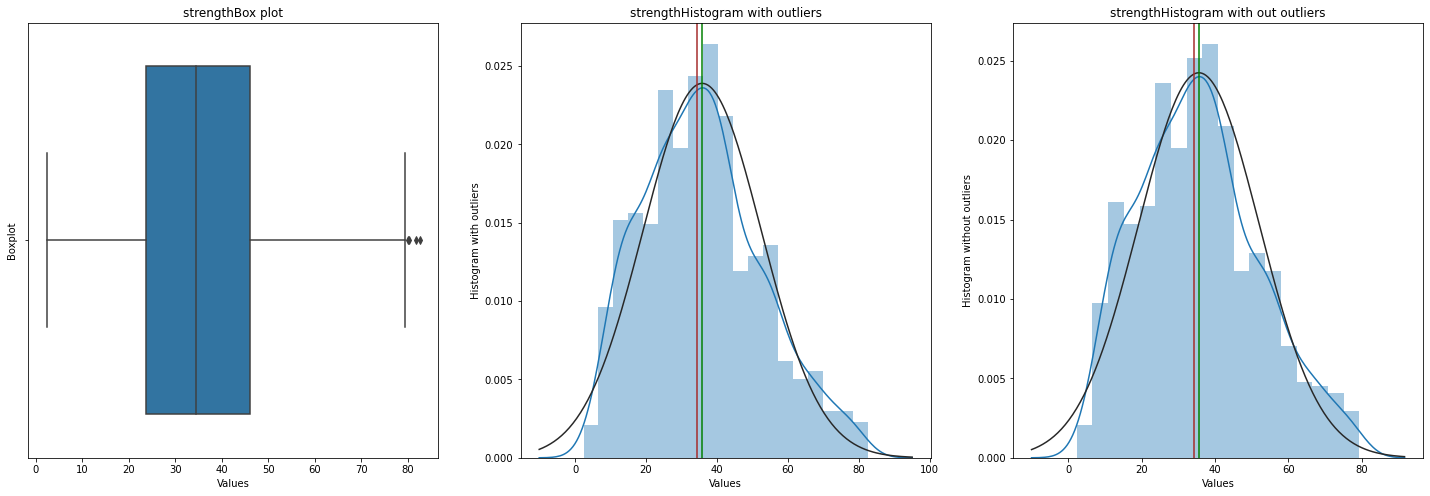

In [10]:
for col in df.columns:
    odt_plots(df,col)

### Multivariate Analysis using Regrassion

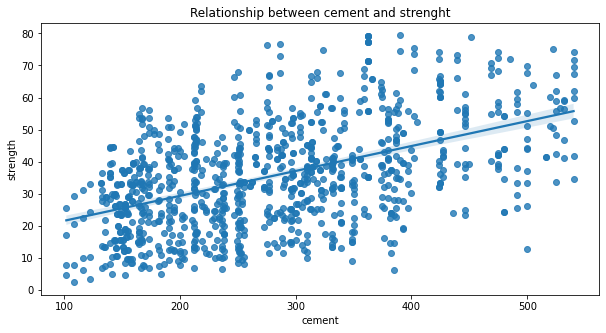

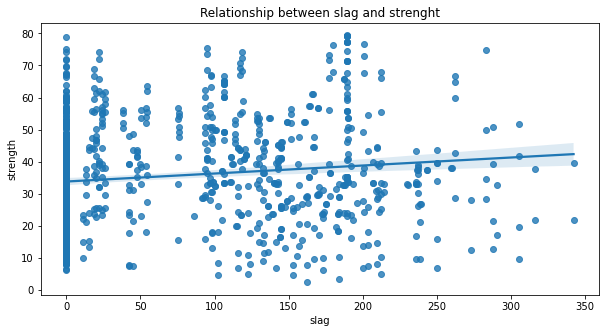

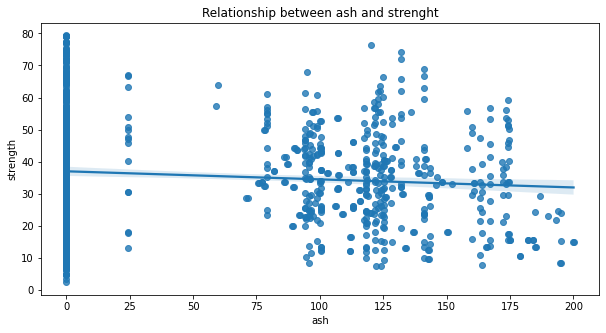

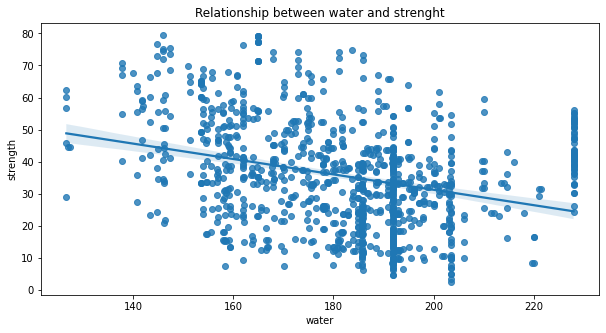

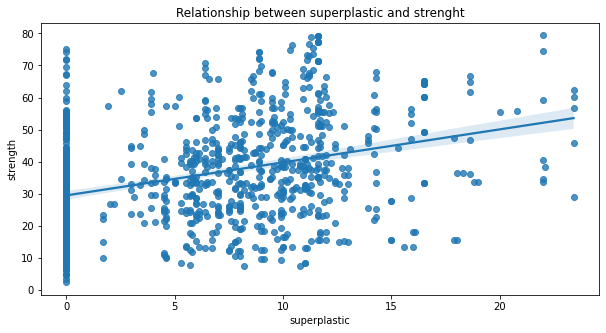

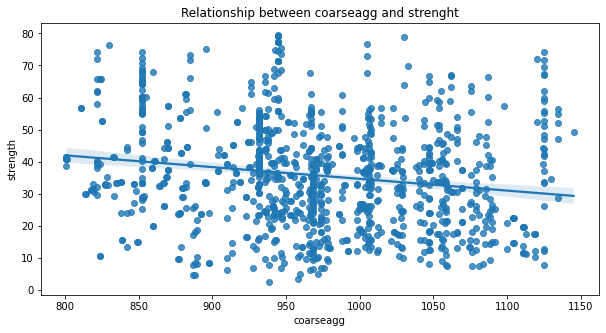

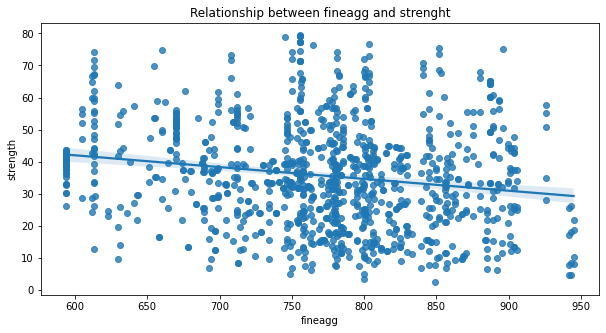

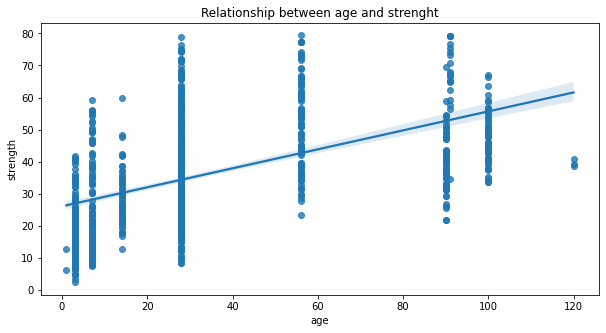

In [11]:
for col in df.columns:
    if col !='strength':
        fig , ax1 = plt.subplots(figsize =(10,5))
        sns.regplot(x=df[col], y=df['strength'], ax=ax1).set_title(f'Relationship between {col} and strenght')
        

Analysis frm Regression plot

1. Strenght and cements are highly postively correlated
2. Strenght and slag are slightly positively corelated
3. strenght and ash are Slightely negatively correlated
4. strenght and water are highly negatively correlated
5. strenghet and superplastic are slightly postively correlated
6. strenght and corseegg are slightly negatively correlated
7. strenght and fineegg are slightly negatively correlated
8. strenght and age are slightly postively correlated

### Multi Colinearilty Test (Stage 1):
- Corelation matrix / Heat map 


<AxesSubplot:>

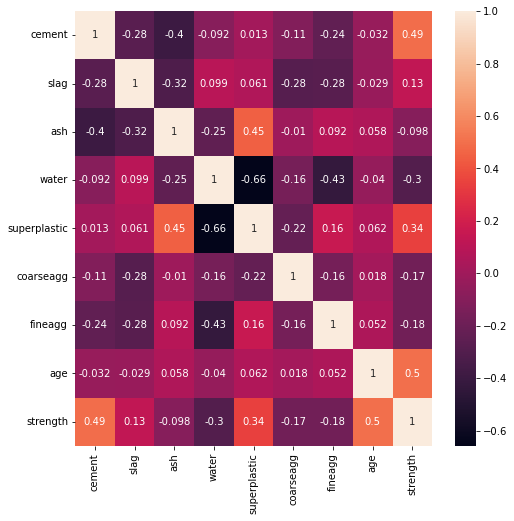

In [12]:
corr = df.corr()
df.ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot = True)

Analysis / results from stage 1 test:

1. Slag has high correlation with ash
2. Ash has high correlation with superplastic
3. water has high correlation with superplastic
4. fineagg has high correlation with water




- Many features has correlation more than 30 % so we can conclude from stage 1 results that there is a change of multicolinearity in the data 

### Multicolinearity test (Stage 2)

- Variance inflation factor (VIF) = 1/(1-R2)
Steps:
1. Replace every independent variabel with each other and calculate the R2
2. Find VIF using above formula
3. If VIF > 5, we say that multicolinearity exists.

In [13]:
def VIF(features):
    vif = pd.DataFrame()
    vif['vif'] =[variance_inflation_factor(features,i) for i in range(features.shape[1])]
    vif['features']=features.columns
    return vif
    
    

In [14]:
VIF(df.drop('strength', axis=1)).sort_values(by = 'vif', ascending = False)

,vif,features
5,86.938582,coarseagg
3,81.963087,water
6,68.664404,fineagg
0,14.291158,cement
4,5.724145,superplastic
2,4.415840,ash
1,3.342314,slag
7,2.368372,age


### Correlation with the target feature

In [15]:
def correlation_with_target(data, t_col):
    independent_var = data.drop(t_col, axis=1).columns
    cor_results=[]
    for col in independent_var:
        cor_results.append(data[t_col].corr(data[col]))
        
    result = pd.DataFrame([independent_var,cor_results],index = ['Independent_variable','Correlation']).T
    return result
    

In [16]:
correlation_with_target(df,'strength').sort_values(by='Correlation', ascending = False)

,Independent_variable,Correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


Analysis:
1. Age and cement haev 49% correlation with strenght
2. superplastic and water have 34% and 12% with strenght

### Applying PCA to treat multicolinearity

PCA is a dimensionality reduction technique that enables us to identify correlations and patterns in a data set so that it can be tranformed into a data set of significantly lower dimensions without loss of any important information.

In [17]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
    #applying standard scaler for feature scaling
    sc = StandardScaler()
    X= sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca = PCA(n_components =i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
            
    print('Explained Variance Ratio after PCA is :', evr)
    #Creating a dataframe of Principle components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df

In [18]:
pca_df = custom_PCA(df.drop('strength', axis = 1))

Explained Variance Ratio after PCA is : [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [19]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228


#Home Work why we do feature scaling??
- Feature scaling helps in bringing all the data in the same range of that data having more    magnitude dont affect the learning algorithm.
- Commonly two techniques  are used in feature scaling:
    1. Normalization( Making data to fit in some range [0,1] or [-1,1]
    2. Standardization( Making mean = 0 and SD = 1)
#different types of standardization

In [20]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Joining PCA features with Target Features

In [21]:
pca_df = pca_df.join(df['strength'], how = 'left')

In [22]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       1030 non-null   float64
 1   PC2       1030 non-null   float64
 2   PC3       1030 non-null   float64
 3   PC4       1030 non-null   float64
 4   PC5       1030 non-null   float64
 5   PC6       1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


In [23]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


### Model Building

Stages of Model Building:

- Custom train test split function
- (To perform) cross validation
- (To do) Hyperparametre tunning

In [37]:
def train_and_test_split(data,tcol,testSize=0.3, randomState = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X,y,test_size=testSize,random_state=randomState )

In [42]:
def model_builder(model_name, model, data,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name,r2,rmse]
    return result

In [43]:
model_builder(model_name='Linear Regression', model=LinearRegression(),data = pca_df,t_col='strength')

['Linear Regression', 0.7005612990763813, 9.098029413143959]

In [61]:
 def multiple_models(data, t_col):
        col_names = ['Model_Name','r2_Score','rmse']
        result = pd.DataFrame(columns = col_names)
        result.loc[len(result)]= model_builder('Linear regression',LinearRegression(),data,t_col)
        result.loc[len(result)]= model_builder('Lasso',Lasso(),data,t_col)
        result.loc[len(result)]= model_builder('Ridge',Ridge(),data,t_col)
        result.loc[len(result)]= model_builder('Decision tree',DecisionTreeRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('KNN',KNeighborsRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Random forrest',RandomForestRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('SVM',SVR(),data,t_col)
        result.loc[len(result)]= model_builder('Gboost',GradientBoostingRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Xgboost',XGBRegressor(),data,t_col)
        result.loc[len(result)]= model_builder('Adaboost',AdaBoostRegressor(),data,t_col)
        return result.sort_values(by='r2_Score',ascending = False)

In [62]:
multiple_models(pca_df,'strength')

,Model_Name,r2_Score,rmse
8,Xgboost,0.871814,5.952696
5,Random forrest,0.856911,6.289223
7,Gboost,0.839125,6.668644
4,KNN,0.779972,7.798882
9,Adaboost,0.735795,8.546023
3,Decision tree,0.702397,9.070101
0,Linear regression,0.700561,9.098029
2,Ridge,0.700433,9.099976
6,SVM,0.698851,9.123982
1,Lasso,0.673922,9.494112


In [68]:
def k_fold_cv(X, y , fold=10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS = cross_val_score(Lasso(),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(),X,y,cv=fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_SVM = cross_val_score(SVR(),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(),X,y,cv=fold)
    score_ADA = cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    
    model_name = ['Linear Regression','Lasso','Ridge','Decision tree','KNN','Random Forrest','SVM','Gradient Boost','XG Boost','ADA Boost']
    scores = [score_LR,score_LS,score_RD,score_DTR,score_KNN,score_RF,score_SVM,score_GB,score_XGB,score_ADA]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
        
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values(by = 'CV Accuracy', ascending = False)

In [69]:
k_fold_cv(pca_df.drop('strength', axis = 1),pca_df['strength'])

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.873262,0.036061
5,Random Forrest,0.867188,0.033403
7,Gradient Boost,0.829092,0.050533
4,KNN,0.768368,0.056078
3,Decision tree,0.766855,0.058905
9,ADA Boost,0.727614,0.029129
6,SVM,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887


### Hyperparameter Tunning

In [79]:
def tunning(X, y , fold=10):
    param_las= {'alpha': [1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_dtr = {'max_depth':[3,5,7,9,10,12,14,16],'max_features':['auto','log2','sqrt',2,3,4,5,6]}
    param_svr = {'gamma':['scale','auto'],'C':[0.5,1]}
    param_adb = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_gb  = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xgb = {'eta':[0.0,0.1,0.2,0.3,0.4,0.5],'max_depth':[3,5,7,9,10],'gamma':[0,10,20,30,40,50,60,70,80,90,100,200,300,400,500],'reg_lambda':[0,1]}
    param_RF  = {'max_depth':[3,5,7,9,10,12,14,16],'max_features':['auto','log2','sqrt',2,3,4,5,6]}
    
    #hyperparametre tunning:
    tune_las = GridSearchCV(Lasso(),param_las,cv=fold)
    tune_rd = GridSearchCV(Ridge(),param_las,cv=fold)
    tune_knn = GridSearchCV(KNeighborsRegressor(), param_knn,cv=fold)
    tune_dtr = GridSearchCV(DecisionTreeRegressor(), param_dtr,cv=fold)
    tune_svr = GridSearchCV(SVR(), param_svr,cv=fold)
    tune_abd = GridSearchCV(AdaBoostRegressor(), param_adb,cv=fold)
    tune_gd = GridSearchCV(GradientBoostingRegressor(), param_gb,cv=fold)
    tune_xgd = GridSearchCV(XGBRegressor(), param_xgb,cv=fold)
    tune_RF = GridSearchCV(RandomForestRegressor(), param_RF,cv=fold)
    
    #Fitting x and y:
    
    tune_las.fit(X, y)
    tune_rd.fit(X, y)
    tune_knn.fit(X, y)
    tune_dtr.fit(X, y)
    tune_svr.fit(X, y)
    tune_abd.fit(X, y)
    tune_gd.fit(X, y)
    tune_xgd.fit(X, y)
    tune_RF.fit(X, y)
    
    tune = [tune_las,tune_rd,tune_knn,tune_dtr,tune_svr,tune_abd,tune_gd,tune_xgd,tune_RF]
    models = ['Lasso','Ridge','KNN','Decision Tree','SVM','ADA Boost','Gradient Boosting','XG Boost','Random Forrest']
    
    for i in range(len(tune)):
        print('Models:',models[i])
        print('Best parametres:',tune[i].best_params_)
        
        

In [80]:
#tunning(pca_df.drop('strength', axis = 1),pca_df['strength'])

Models: Lasso
Best parametres: {'alpha': 0.1}
Models: Ridge
Best parametres: {'alpha': 6}
Models: KNN
Best parametres: {'n_neighbors': 4}
Models: Decision Tree
Best parametres: {'max_depth': 10, 'max_features': 5}
Models: SVM
Best parametres: {'C': 1, 'gamma': 'scale'}
Models: ADA Boost
Best parametres: {'learning_rate': 0.5}
Models: Gradient Boosting
Best parametres: {'alpha': 0.6}
Models: XG Boost
Best parametres: {'eta': 0.2, 'gamma': 0, 'max_depth': 5, 'reg_lambda': 0}
Models: Random Forrest
Best parametres: {'max_depth': 16, 'max_features': 4}


### Cross validation post Hyperparameters Tuning

In [85]:
def cv_post_hpt(X, y, fold = 10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LAS = cross_val_score(Lasso(alpha = 0.1),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(alpha = 6),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(n_neighbors=4),X,y,cv=fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(max_depth=10,max_features=5 ),X,y,cv=fold)
    score_SVM = cross_val_score(SVR(C=1,gamma='scale'),X,y,cv=fold)
    score_ADA = cross_val_score(AdaBoostRegressor(learning_rate=0.5),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(alpha=0.6),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(eta=0.2,gamma=0,max_depth=5,reg_lambda=0),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(max_depth=16,max_features=4),X,y,cv=fold)
    
    model_name = ['Linear Regression','Lasso','Ridge','Decision tree','KNN','Random Forrest','SVM','Gradient Boost','XG Boost','ADA Boost']
    scores = [score_LR,score_LAS,score_RD,score_DTR,score_KNN,score_RF,score_SVM,score_GB,score_XGB,score_ADA]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV Accuracy' , 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

    

In [86]:
cv_post_hpt(pca_df.drop('strength', axis = 1),pca_df['strength'])

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.879316,0.036140
5,Random Forrest,0.867706,0.031756
7,Gradient Boost,0.829256,0.050353
4,KNN,0.770844,0.054646
3,Decision tree,0.761304,0.041514
9,ADA Boost,0.724338,0.040855
6,SVM,0.703117,0.042765
1,Lasso,0.664143,0.058426
2,Ridge,0.663951,0.059242
0,Linear Regression,0.663928,0.059476


### Clustering 
- using kmeans clustering to check if accuracy can be improved any further

<AxesSubplot:xlabel='cement', ylabel='strength'>

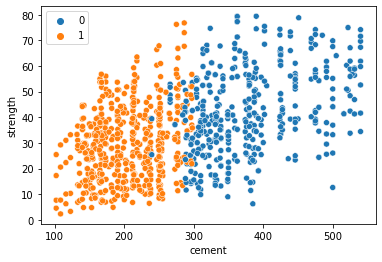

In [84]:
kmeans = KMeans(n_clusters = 2, random_state=2)
clusters = kmeans.fit_predict(df.drop('strength', axis = 1))
sns.scatterplot(x = df['cement'], y = df['strength'], hue=clusters)

-here we have plotted a scatter plot between cement and strength,
-Here we are checking whether we have any clusters in the dataset or not, if there are cluster we can see clear segregn of datapoint.
-let me annotate, This is my original data with 8 columns and y as target column, i will ad one more column, and in this column we only have 0 and 1
- what this 0 and 1 will tell is whether it belogns to 0 or 1,
- this clustering will help my model to understand the data better
- new column we are adding it will help my model to understand the data better.
- this will ultimately help me to improve my accuracy.
- and this is how we can take clustering approach, and add a column in my dataset which will help me to predict my y better.


In [87]:
def clustering(X, tcol, clusters):
    column = list(set(list(X.columns))-set(X['strength']))
    r = int(len(column)/2)
    if r%2 == 0:
        r=r
    else:
        r+=1
        
    f,ax = plt.subplots(r,2,figsize=(15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a!=len(column):
                ax[row][col].scatter(X[tcol],X[column[a]],c=clusters)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a+=1
                

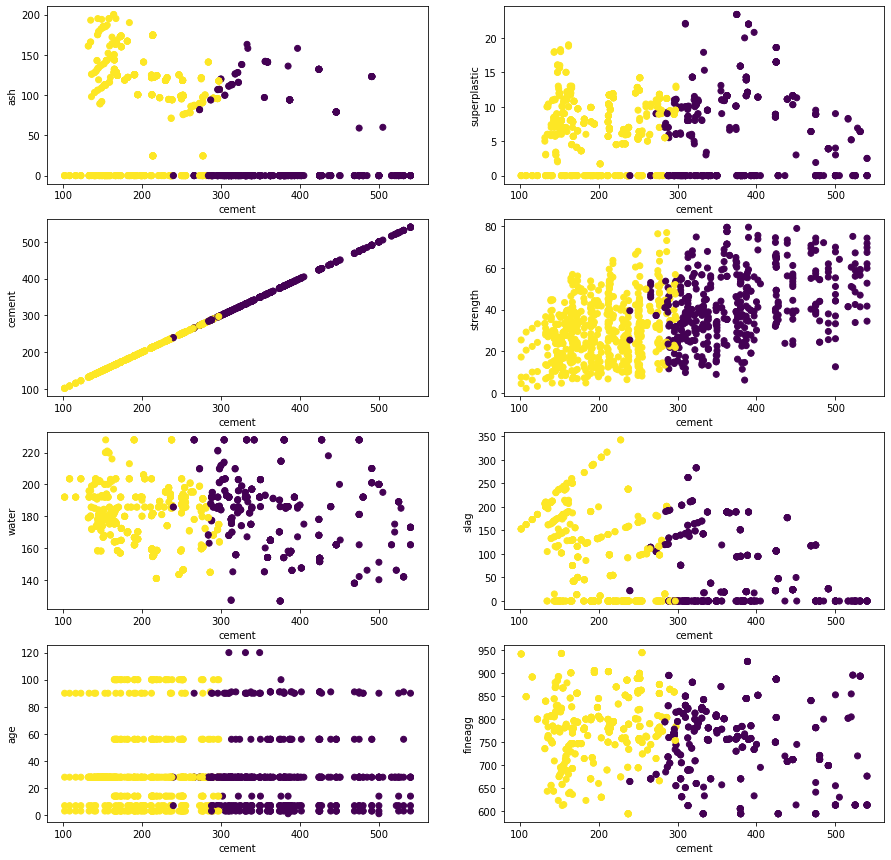

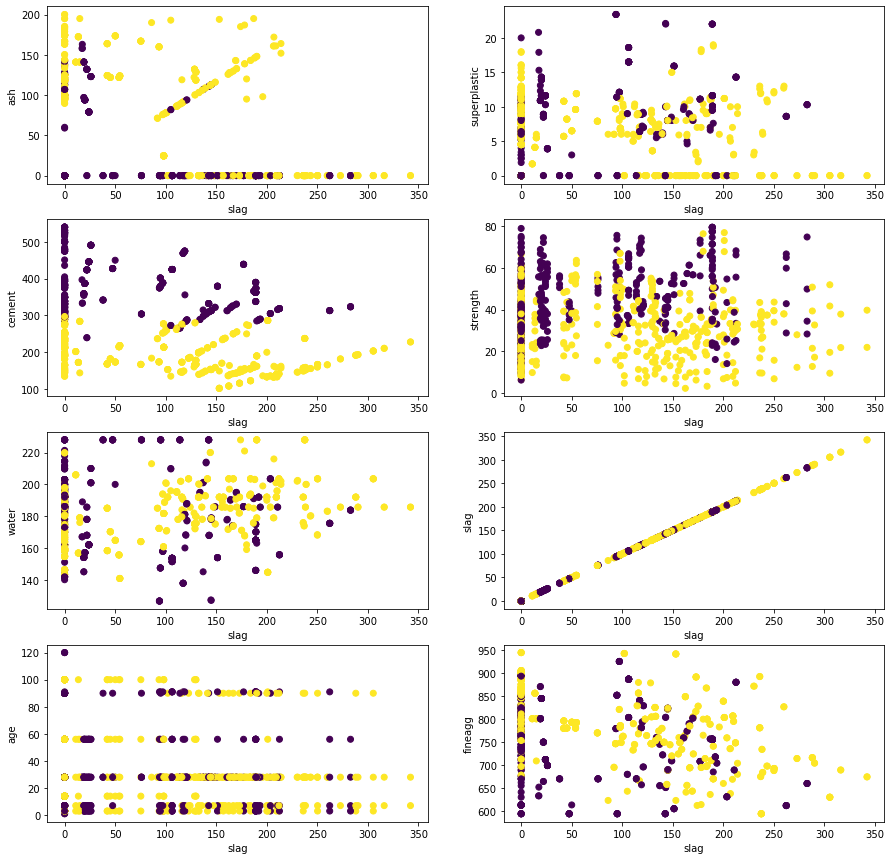

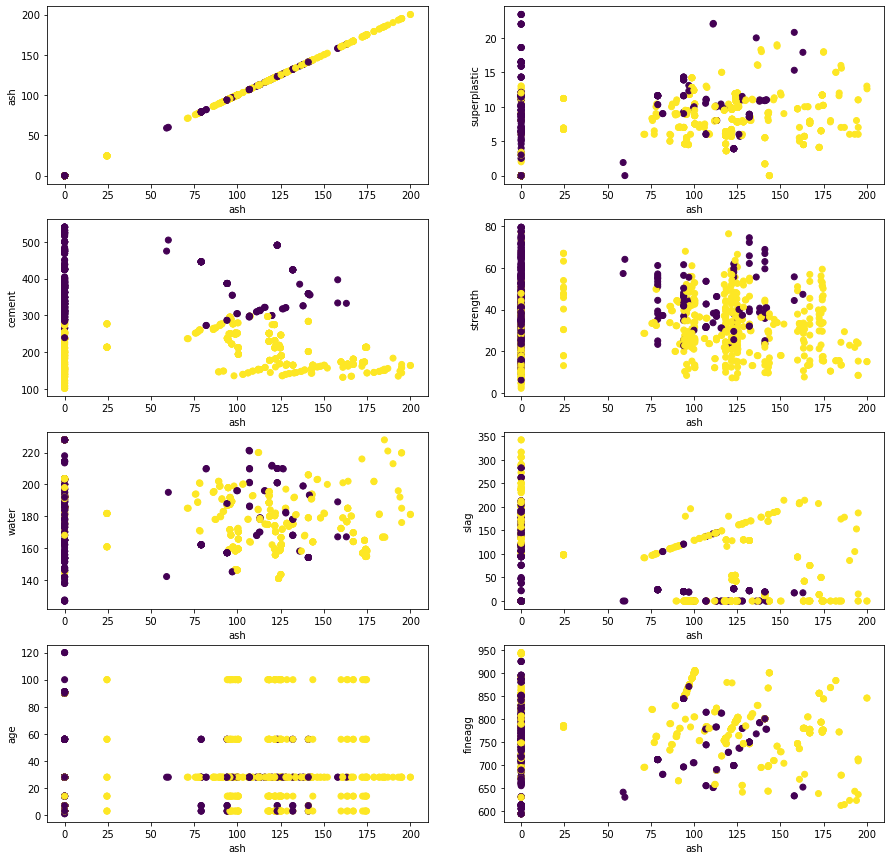

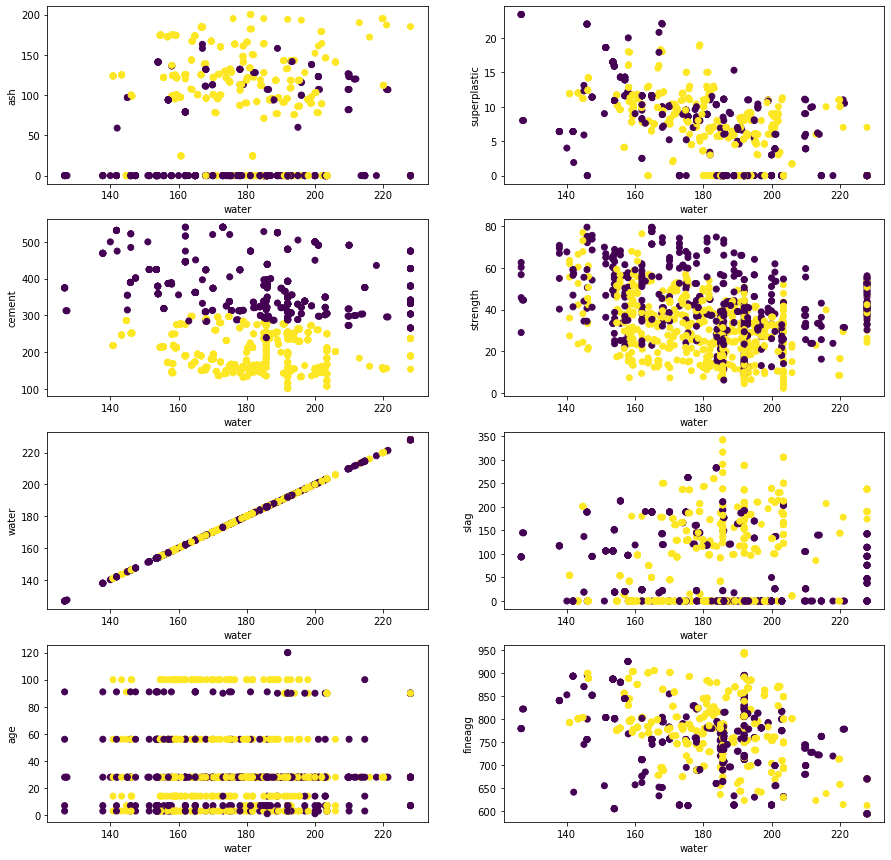

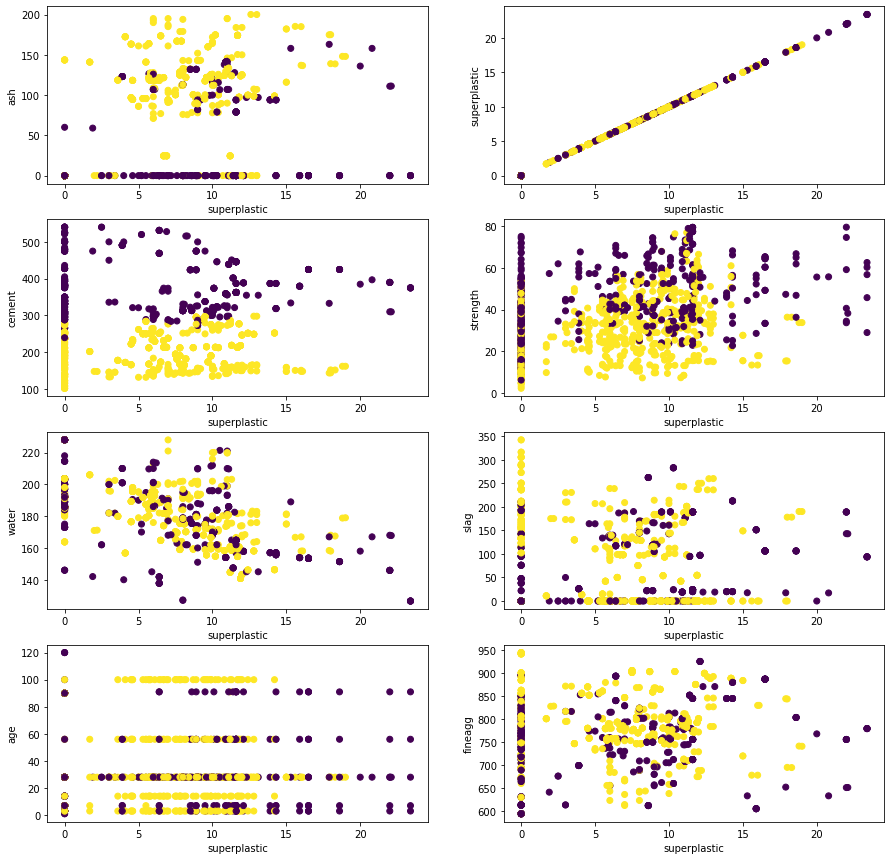

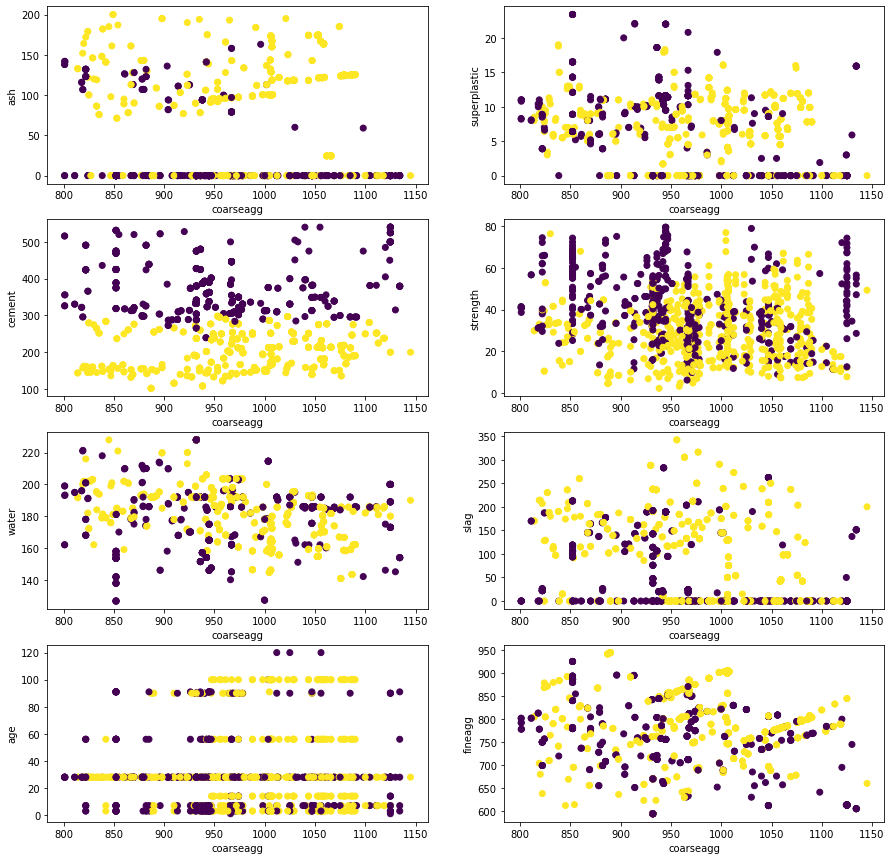

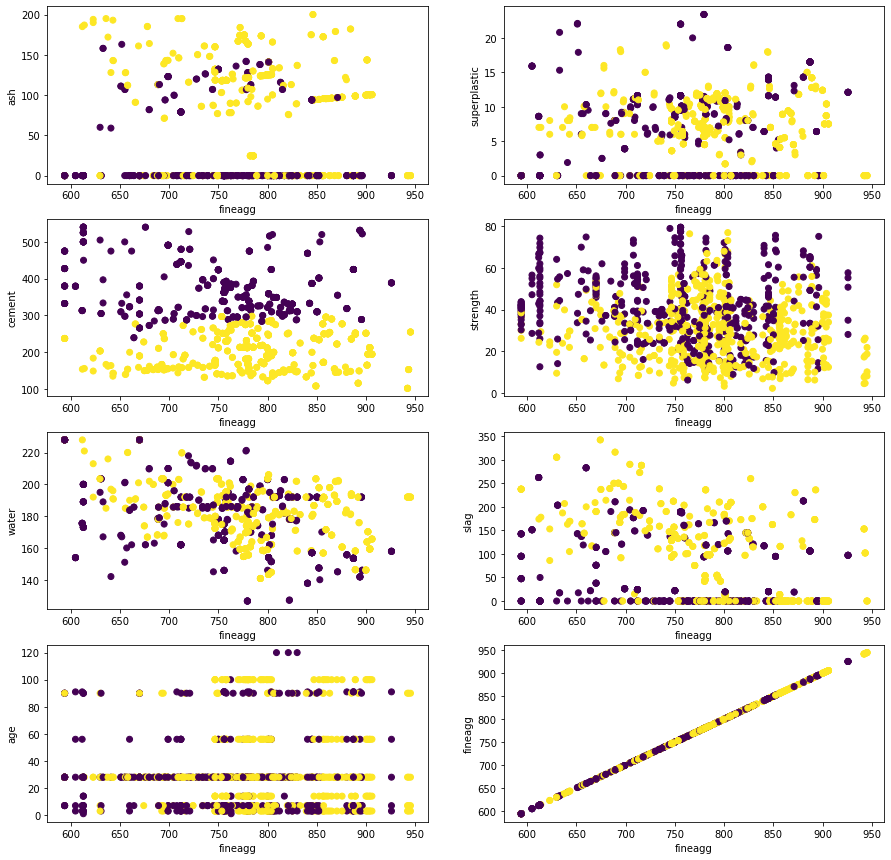

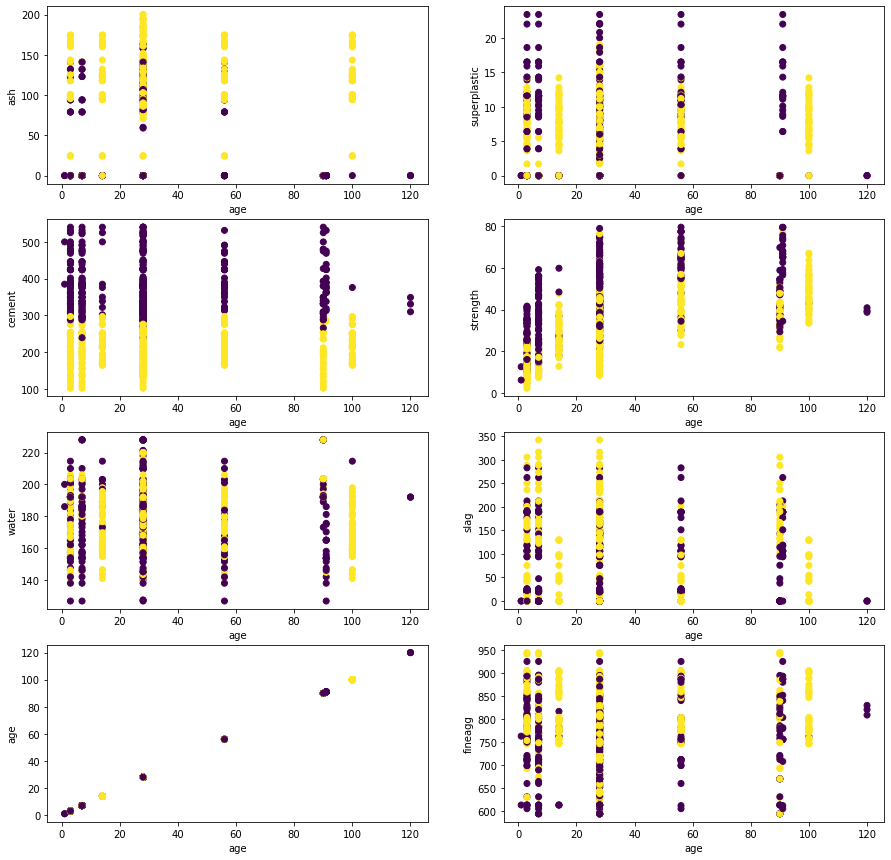

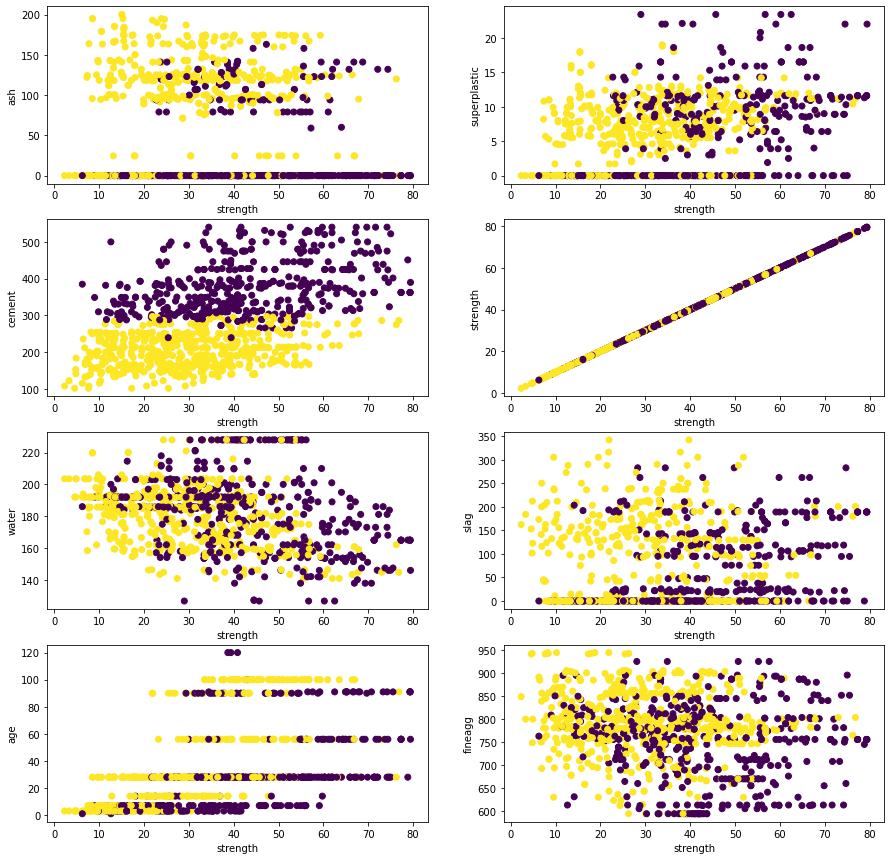

In [89]:
X = df.drop('strength', axis=1)
for col in df.columns:
    clustering(df, col,clusters)
    

Analysis:
- cement is forming clusters with all other independent variables
    
    

In [90]:
new_df = df.join(pd.DataFrame(clusters,columns=['Clusters']), how = 'left')

In [91]:
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Clusters
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


In [92]:
new_df['Clusters'].value_counts()

1    567
0    463
Name: Clusters, dtype: int64

In [93]:
clusters_agg = new_df.groupby('Clusters')['cement'].agg(['mean','median'])
clusters_agg

,mean,median
Clusters,,
0,376.731317,362.6
1,203.132804,202.0


In [96]:
clusters_df = new_df.merge(clusters_agg, on ='Clusters', how = 'left')
clusters_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Clusters,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,203.132804,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,203.132804,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1,203.132804,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0,376.731317,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,203.132804,202.0


In [97]:
multiple_models(clusters_df.drop('Clusters', axis=1), 'strength')

,Model_Name,r2_Score,rmse
8,Xgboost,0.887210,5.583787
5,Random forrest,0.882734,5.693495
7,Gboost,0.875495,5.866594
3,Decision tree,0.837204,6.708351
9,Adaboost,0.739277,8.489513
2,Ridge,0.720884,8.783872
0,Linear regression,0.720696,8.786820
1,Lasso,0.719979,8.798093
4,KNN,0.639270,9.985832
6,SVM,0.257763,14.324008


In [99]:
X = clusters_df.drop(['Clusters','strength'], axis=1)
y = clusters_df['strength']
k_fold_cv(X, y)

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.899436,0.046856
5,Random Forrest,0.886916,0.036301
7,Gradient Boost,0.875714,0.045075
3,Decision tree,0.832647,0.055089
9,ADA Boost,0.746380,0.035655
0,Linear Regression,0.686721,0.062347
2,Ridge,0.686641,0.062314
1,Lasso,0.686437,0.062413
4,KNN,0.669227,0.087720
6,SVM,0.246843,0.044778


In [100]:
cv_post_hpt(X,y)

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.896546,0.047893
5,Random Forrest,0.892084,0.032427
7,Gradient Boost,0.875809,0.044856
3,Decision tree,0.789166,0.057326
9,ADA Boost,0.740824,0.035328
0,Linear Regression,0.686721,0.062347
1,Lasso,0.686641,0.062319
2,Ridge,0.686641,0.062315
4,KNN,0.679909,0.079220
6,SVM,0.246843,0.044778


## Understanding Features Importance Using XGboost

In [101]:
x_train,x_test,y_train,y_test = train_and_test_split(clusters_df.drop(['Clusters'], axis=1),'strength')

In [102]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

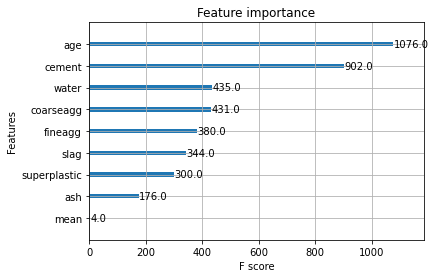

In [103]:
xgboost.plot_importance(xgb)

Analysis

- Age and cement are the two most important features for predicting the strength of the mixture

In [106]:
imp_features = clusters_df[['age','cement','water','coarseagg','fineagg','strength']]
cv_post_hpt(imp_features.drop('strength', axis = 1), imp_features['strength'])

,Model Name,CV Accuracy,CV STD
8,XG Boost,0.887750,0.038153
5,Random Forrest,0.869336,0.032357
7,Gradient Boost,0.842154,0.039951
3,Decision tree,0.794349,0.077333
9,ADA Boost,0.696966,0.033691
1,Lasso,0.657583,0.060431
2,Ridge,0.657579,0.060465
0,Linear Regression,0.657579,0.060465
4,KNN,0.652519,0.088818
6,SVM,0.252828,0.044987


## Building learning curve analysis-

In [107]:
def generate_learning_curve(model_name , estimator , X , y):
    train_size , train_score , test_score = learning_curve(estimator = estimator , X = X , y = y , cv = 10)
    train_score_mean = np.mean(train_score , axis = 1)
    test_score_mean = np.mean(test_score , axis = 1)
    plt.plot(train_size , train_score_mean , c = 'blue')
    plt.plot(train_size , test_score_mean , c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for ' + model_name)
    plt.legend(('Training R2 Score' , 'Testing R2 Score'))


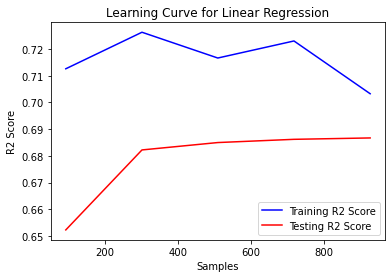

In [109]:
generate_learning_curve('Linear Regression' , LinearRegression() , clusters_df.drop(['Clusters' , 'strength'] , axis = 1) , clusters_df['strength'])


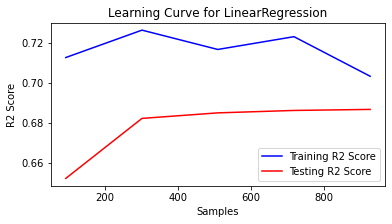

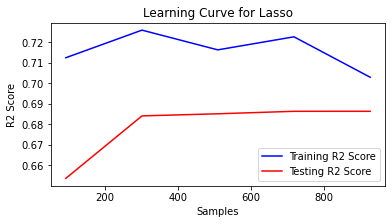

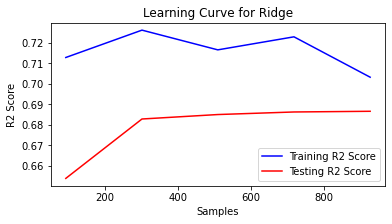

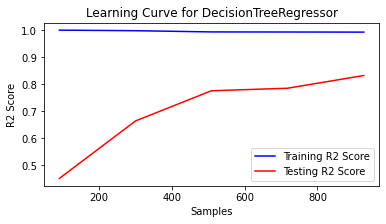

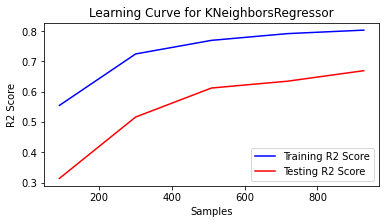

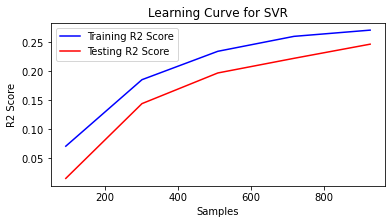

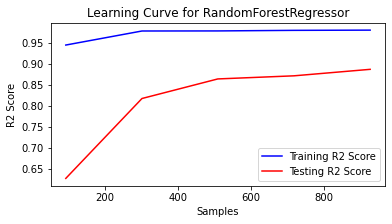

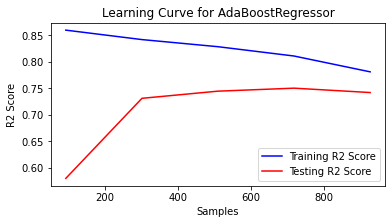

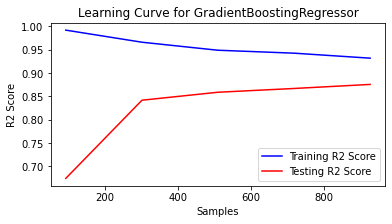

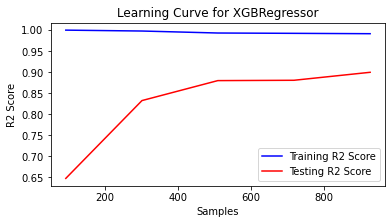

In [111]:
models = [LinearRegression() , Lasso(), Ridge() , DecisionTreeRegressor() , KNeighborsRegressor() ,
            SVR() , RandomForestRegressor() , AdaBoostRegressor() , GradientBoostingRegressor(), 
              XGBRegressor()]
for a , model in enumerate (models):
    fg = plt.figure(figsize= (6 , 3))
    ax = fig.add_subplot(10 , 1 , a+1)
    generate_learning_curve(type(models[a]).__name__ , model , clusters_df.drop(['Clusters' , 'strength'] , axis = 1), clusters_df['strength'])
